In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot
from sklearn import cluster
from sklearn import decomposition
from sklearn import tree

%matplotlib inline

In [2]:
salaries = pd.read_json('./salaries-full.json')

In [3]:
salaries = salaries[(salaries['salary'] < 250000) & (salaries['salary_curr'] == 'RUR')]
salaries = salaries[salaries['employer'] != 'ООО Элитный Сочи']

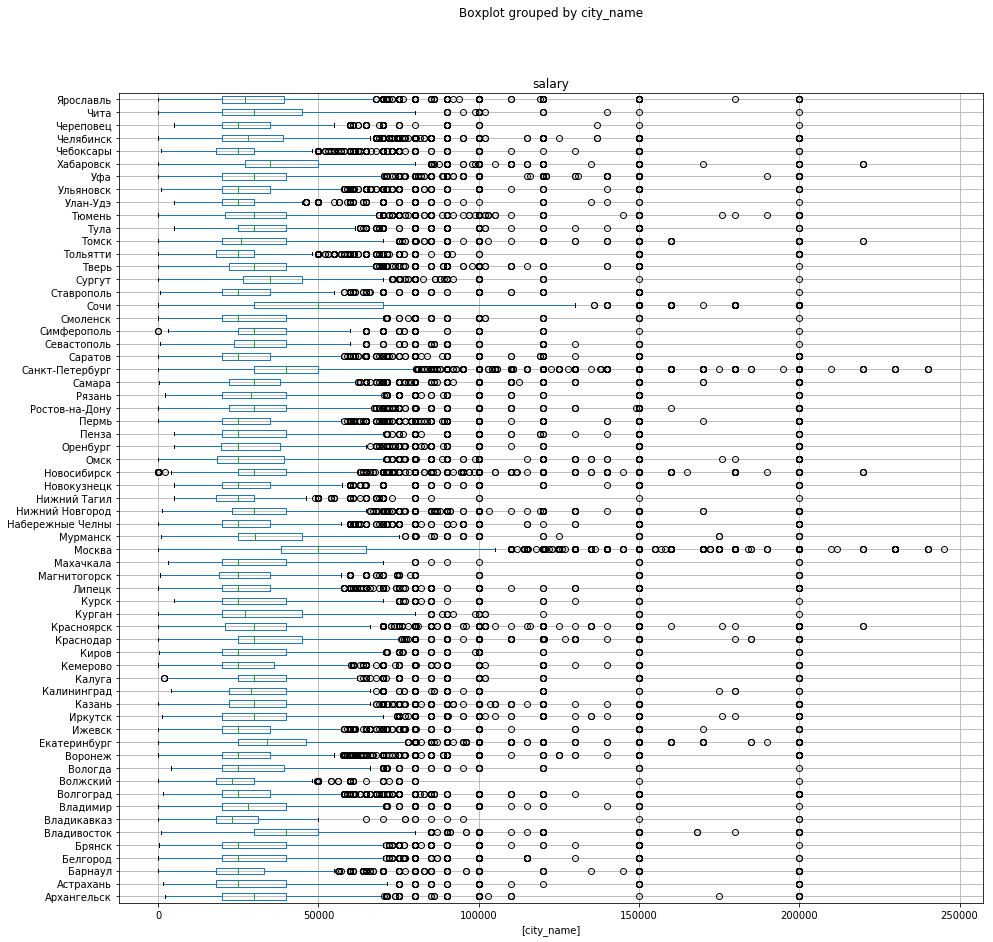

In [4]:
salaries.sort_values('city_name')[['city_name', 'salary']].boxplot(by='city_name', figsize=(15,15), vert=False)

In [5]:
sochi = salaries[salaries['city_name'] == 'Сочи']

,salary,spec_count
spec,,
"IT, телеком",40000,88
Авто,40000,34
Админ. персонал,30000,176
Банки,39950,143
Безопасность,35000,25
Бухгалтерия,30000,53
Госслужба,60000,2
Добыча сырья,90000,1
Домашний персонал,25000,36


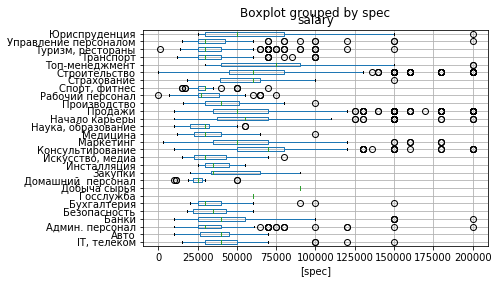

In [6]:
sochi[['spec', 'salary']].boxplot(by='spec', vert=False)
sochi.groupby('spec').median()

In [7]:
sochi[sochi['spec'] == 'Консультирование'].groupby('employer').count()

,city_name,metro_station,salary,salary_curr,spec,spec_count,title
employer,,,,,,,
Real Недвижимость,12,0,12,12,12,12,12
АН Лидер,17,0,17,17,17,17,17
АСКА недвижимость,21,0,21,21,21,21,21
Агентство недвижимости ЭТАЖИ,10,0,10,10,10,10,10
Билайн ШПД,1,0,1,1,1,1,1
Билайн: Офисы продаж,1,0,1,1,1,1,1
Евросеть,1,0,1,1,1,1,1
Клиника Екатерининская,1,0,1,1,1,1,1
Реал Инвест,81,0,81,81,81,81,81


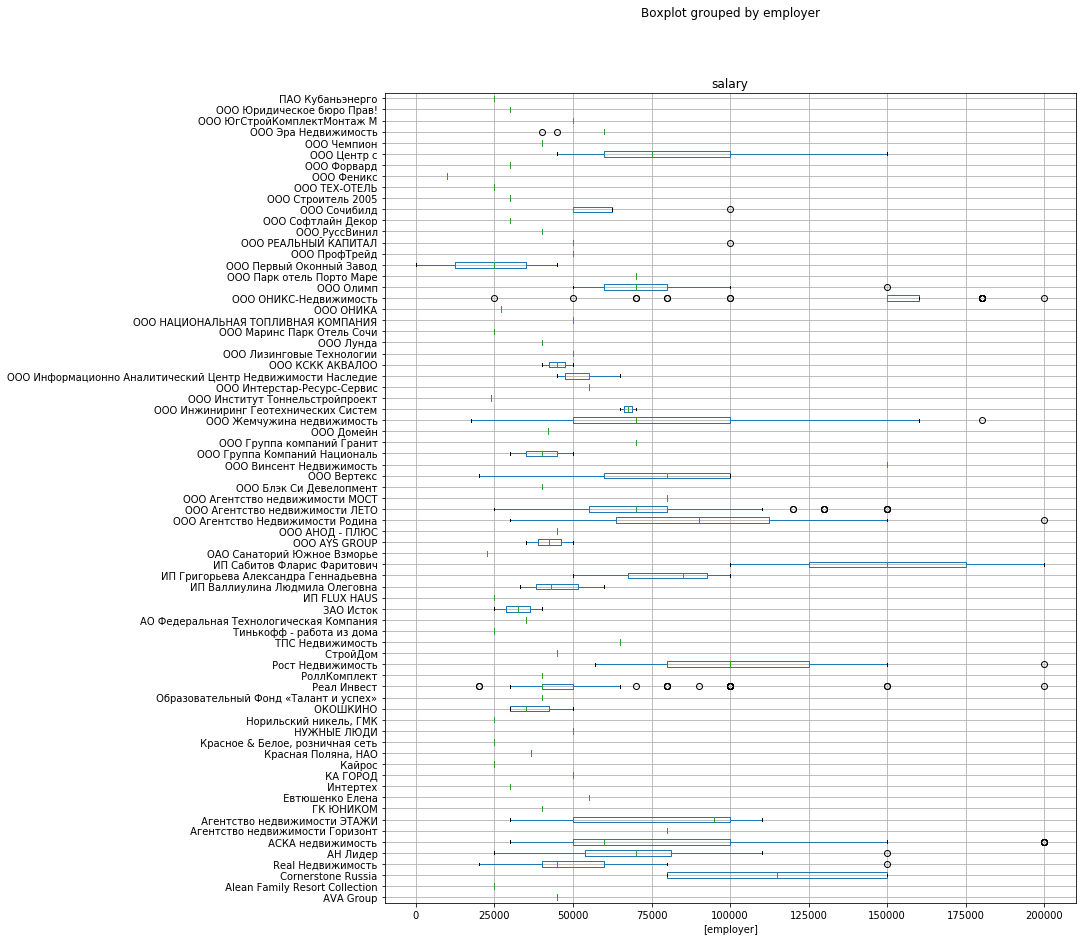

In [8]:
sochi[sochi['spec'] == 'Строительство'][['employer', 'salary']].boxplot(by='employer', vert=False, figsize=(12,15))

In [9]:
cities = list(salaries['city_name'].unique())
specs = list(salaries['spec'].unique())

In [10]:
g = salaries.groupby(['city_name', 'spec']).median().reset_index()

In [11]:
from collections import defaultdict
cityXspec = defaultdict(lambda: defaultdict(int))
for (i, r) in g.iterrows():
    cityXspec[r['city_name']][r['spec']] = r['salary'] if r['spec_count'] > 10 else pd.np.nan
for city in g['city_name'].unique():
    cityXspec[city]['median'] = g[g['city_name'] == city]['salary'].median()

In [12]:
flat = []
for (city_name, cols) in cityXspec.items():
    row = dict(cols)
    row['city_name'] = city_name
    flat.append(row)
df_strat = pd.DataFrame(flat)
del df_strat['Топ-менеджмент']

In [13]:
for (col, sparse) in ((df_strat == 0).sum() / df_strat.count() > 0.5).items():
    if sparse:
        del df_strat[col]
for col in df_strat.columns:
    if col == 'city_name' or col == 'median':
        continue
    df_strat[col] = df_strat[col].fillna(value=df_strat['median'])
#     нормализция по городам
    df_strat[col] = df_strat[col] / df_strat['median']
#     df_strat[col] = df_strat[col] / df_strat[col].median()

del df_strat['median']
df_strat

,"IT, телеком",city_name,Авто,Админ. персонал,Банки,Безопасность,Бухгалтерия,Госслужба,Добыча сырья,Домашний персонал,...,Продажи,Производство,Рабочий персонал,"Спорт, фитнес",Страхование,Строительство,Транспорт,"Туризм, рестораны",Управление персоналом,Юриспруденция
0,1.000000,Архангельск,1.166667,0.730000,0.915000,1.166667,0.833333,1.000000,1.000000,1.000000,...,1.000000,1.416667,1.416667,1.000000,1.083333,1.333333,1.250000,0.683333,1.000000,0.666667
1,1.400000,Астрахань,1.000000,0.720000,1.000000,1.200000,0.800000,1.000000,1.000000,1.000000,...,1.000000,1.720000,2.000000,1.000000,1.000000,1.240000,1.000000,0.800000,1.100000,0.800000
2,1.200000,Барнаул,1.000000,0.720000,0.960000,0.720000,0.880000,1.000000,1.000000,1.000000,...,1.000000,1.040000,0.920000,0.800000,1.100000,1.200000,1.000000,0.800000,1.000000,1.000000
3,1.061947,Белгород,1.039575,0.707965,0.884956,1.008850,0.884956,1.000000,1.000000,1.000000,...,0.884956,1.274336,1.592920,0.991150,1.385841,1.238938,0.991150,0.796460,1.061947,0.955752
4,1.038462,Брянск,0.961538,0.769231,0.961538,1.230769,0.769231,1.000000,1.000000,1.000000,...,0.961538,1.153846,1.730769,1.153846,1.000000,1.346154,1.153846,0.961538,1.153846,1.057692
5,1.125000,Владивосток,0.937500,0.750000,0.875000,0.900000,0.875000,1.000000,1.000000,1.000000,...,1.000000,1.160000,1.000000,0.937500,0.775000,1.250000,1.000000,1.000000,1.000000,1.000000
6,1.000000,Владикавказ,1.000000,0.824742,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.989691,1.000000,1.000000,1.000000,1.000000,1.000000,1.010309,1.000000,1.000000,1.000000
7,1.000000,Владимир,1.000000,0.666667,1.000000,1.000000,0.833333,1.000000,1.000000,1.000000,...,0.933333,1.166667,1.166667,1.000000,1.000000,1.166667,1.166667,0.733333,0.783333,1.000000
8,1.186944,Волгоград,1.186944,0.791296,1.050445,0.989120,0.929773,1.000000,1.000000,0.716123,...,0.989120,1.186944,1.246291,0.791296,1.186944,1.305638,1.010880,0.909990,1.186944,0.989120
9,1.363636,Волжский,1.000000,0.781818,1.136364,1.590909,1.000000,1.000000,1.000000,1.000000,...,1.045455,1.272727,1.363636,1.000000,1.000000,1.136364,1.136364,0.909091,1.000000,1.000000


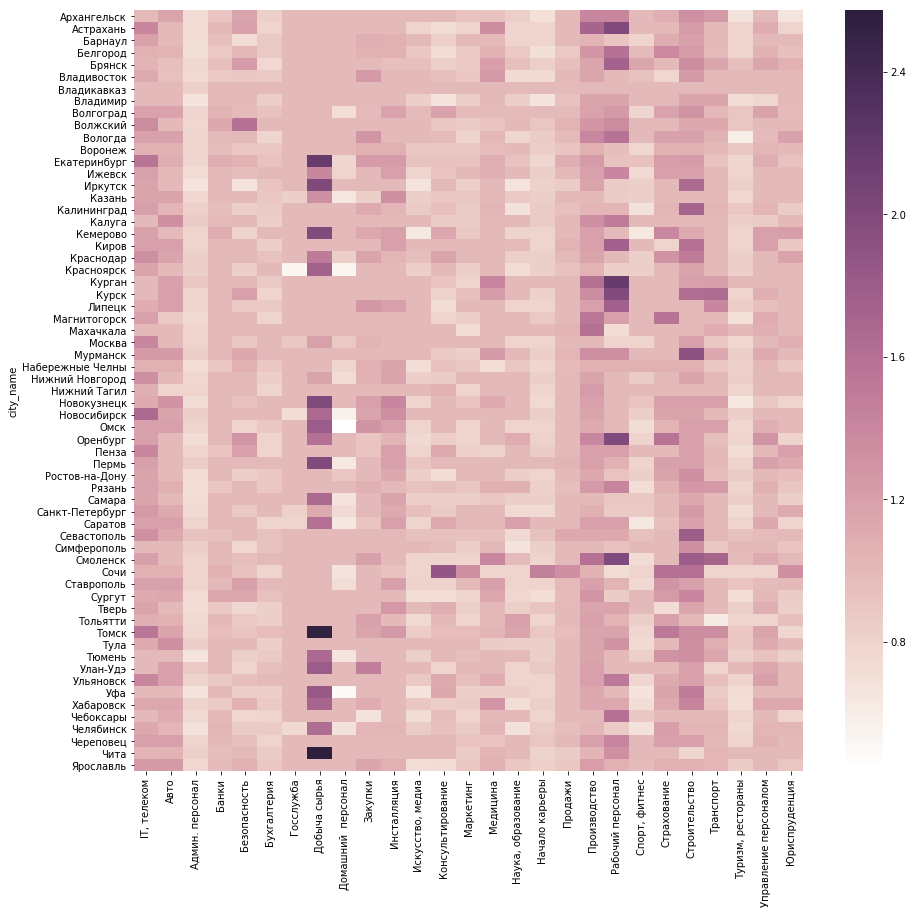

In [14]:
def heatmap(df, sz):
    fig, ax = pyplot.subplots(figsize=(sz, sz / len(df.columns) * df.count()[0] / 2.5))
    cmap = sns.cubehelix_palette(light=1, as_cmap=True)
    sns.heatmap(df, ax=ax, cmap=cmap)
heatmap(df_strat.set_index('city_name'), 15)

In [15]:
salaries[(salaries['city_name'] == 'Смоленск') & (salaries['spec'] == 'Рабочий персонал')]
# salaries[salaries['employer'] == 'ООО Элитный Сочи'][['spec', 'salary']].boxplot(by='spec', vert=False)
# salaries[salaries['employer'] == 'ООО Ресурс Групп']
# df_strat[['city_name', 'Наука, образование']].sort_values('Наука, образование').plot.barh(x='city_name', figsize=(15,15))

,city_name,employer,metro_station,salary,salary_curr,spec,spec_count,title
184598,Смоленск,ООО Велесстрой,None,100000,RUR,Рабочий персонал,109,Электросварщик ручной аргонно-дуговой сварки (...
184711,Смоленск,"Лента, федеральная розничная сеть, Гипермаркет",None,25000,RUR,Рабочий персонал,109,Электромеханик (Смоленск)
184712,Смоленск,ООО Ресурс Групп,None,50000,RUR,Рабочий персонал,109,Кузнец на молотах и прессах
184713,Смоленск,ООО КС Интернешнл,None,18500,RUR,Рабочий персонал,109,"Грузчик-мерчендайзер, г.Смоленск"
184714,Смоленск,ООО Ресурс Групп,None,50000,RUR,Рабочий персонал,109,Кузнец
184715,Смоленск,Снежная Королева,None,25000,RUR,Рабочий персонал,109,Мастер ателье/Швея (ТЦ Макси)
184822,Смоленск,ООО Центр-Сервис Западный,None,25000,RUR,Рабочий персонал,109,Автослесарь
184823,Смоленск,"Группа Компаний «СПОРТМАСТЕР», Розничные продажи",None,22000,RUR,Рабочий персонал,109,Мастер сервисного центра
184824,Смоленск,Кадровый центр Эталон,None,50000,RUR,Рабочий персонал,109,Швея-портной
184825,Смоленск,Управляющая компания Регион,None,50000,RUR,Рабочий персонал,109,Станочник широкого профиля


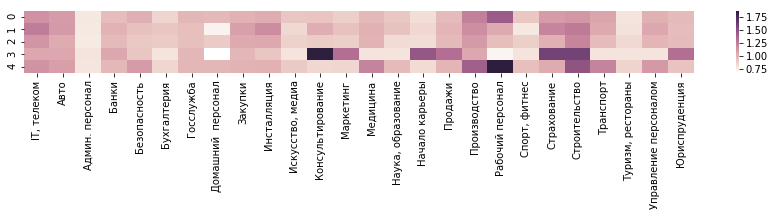

In [20]:
km = cluster.KMeans(n_clusters=5)
clust = km.fit(df_strat.set_index('city_name').copy().drop(['Добыча сырья', 'clust'], 1).as_matrix())
df_strat['clust'] = clust.labels_
cl = pd.DataFrame(clust.cluster_centers_)
cl.columns = [c for c in df_strat.columns if c != 'city_name' and c != 'clust' and c != 'Добыча сырья']
heatmap(cl, 15)

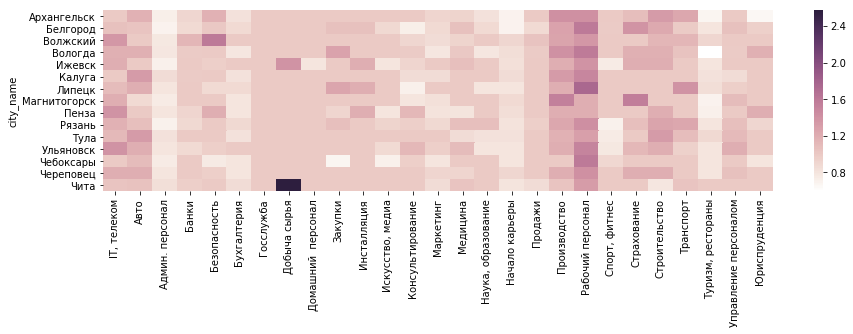

In [21]:
heatmap(df_strat[df_strat['clust'] == 0].set_index('city_name').copy().drop('clust', 1), 15)
# salaries[salaries['city_name'].isin(df_strat[df_strat['clust'] == 0]['city_name'])]['salary'].mean()

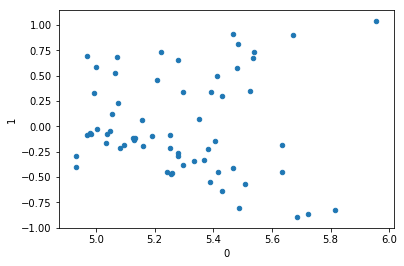

In [22]:
ban = []
m = df_strat[~df_strat['city_name'].isin(ban)].copy().drop(['clust', 'city_name'], 1).as_matrix()
fit = decomposition.TruncatedSVD(n_components=2).fit(m)
t = pd.DataFrame(fit.transform(m))
t['city_name'] = pd.Series([c for c in df_strat['city_name'] if not c in ban])
t.plot.scatter(x=0, y=1)

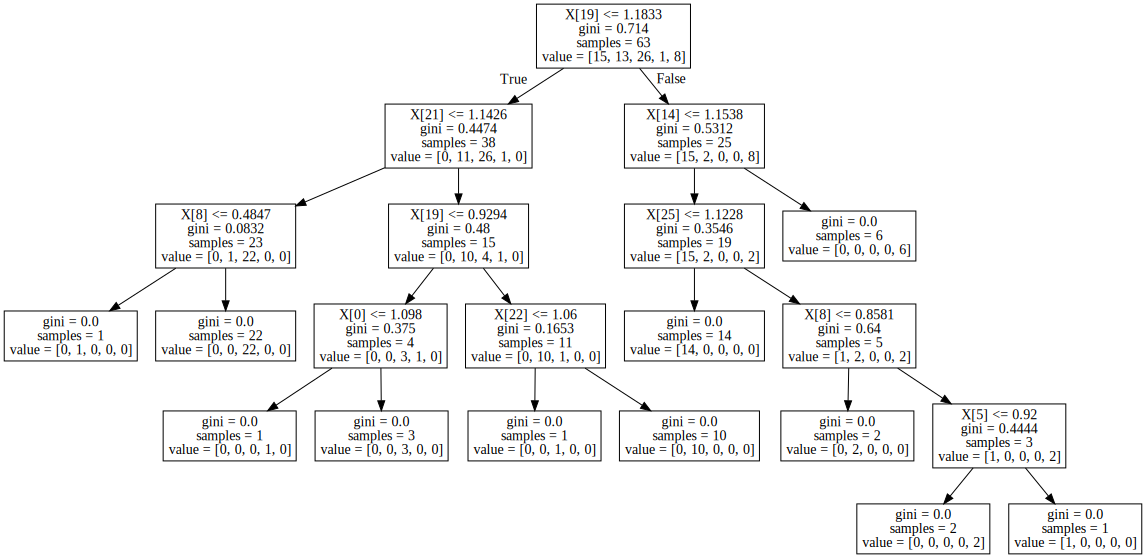

In [23]:
import graphviz 
dt = tree.DecisionTreeClassifier().fit(df_strat.copy().drop(['clust', 'city_name'], 1), df_strat['clust'])
dot_data = tree.export_graphviz(dt, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("iris")
graph


In [24]:
df_strat.copy().drop(['clust', 'city_name'], 1).columns[21]

'Страхование'

In [95]:
import plotly as py
import plotly.graph_objs as go
plotly.offline.init_notebook_mode(connected=True)

cities = salaries['city_name'].unique()
dist_arr = []
hist,bins = np.histogram(salaries[salaries['salary'] < 120000]['salary'], bins=12)
for city in cities:
    by_city = salaries[(salaries['city_name'] == city)]
    y,_ = np.histogram(by_city['salary'], bins=bins)
    row = { 'city_name': city }
    y = y / y.sum()
    for (k, v) in enumerate(y):
        dist_arr.append({ 'city_name': city, 'bin': bins[k], 'dist': v })
distr_df = pd.DataFrame(dist_arr)
# distr_df = distr_df[distr_df['city_name'] != 'Москва']
# heatmap(distr_df.set_index('city_name'), 15)
data = []
for city in cities:
    by_city = distr_df[distr_df['city_name'] == city]
    data.append(go.Scatter(x=by_city['bin'], y=by_city['dist'], name=city))
py.offline.iplot(data)